In [1]:
#https://www.eia.gov/opendata/qb.php?category

import json
import numpy as np
import pandas as pd
from urllib.error import URLError, HTTPError
from urllib.request import urlopen

tok = '2e7c2f1e25cda9ee5d029db899d9fdd3'

class EIAgov(object):
    def __init__(self, token, series):
        '''
        Purpose:
        Initialise the EIAgov class by requesting:
        - EIA token
        - id code(s) of the series to be downloaded

        Parameters:
        - token: string
        - series: string or list of strings
        '''
        self.token = token
        self.series = series

    '''
    def __repr__(self):
        return str(self.series)
    '''

    def Raw(self, ser):
        # Construct url
        url = 'http://api.eia.gov/series/?api_key=' + self.token + '&series_id=' + ser.upper()

        try:
            # URL request, URL opener, read content
            response = urlopen(url);
            raw_byte = response.read()
            raw_string = str(raw_byte, 'utf-8-sig')
            jso = json.loads(raw_string)
            return jso

        except HTTPError as e:
            print('HTTP error type.')
            print('Error code: ', e.code)

        except URLError as e:
            print('URL type error.')
            print('Reason: ', e.reason)

    def GetData(self):
        # Deal with the date series
        date_ = self.Raw(self.series[0])
        date_series = date_['series'][0]['data']
        endi = len(date_series)  # or len(date_['series'][0]['data'])
        date = []
        for i in range(endi):
            date.append(date_series[i][0])

        # Create dataframe
        df = pd.DataFrame(data=date)
        df.columns = ['Date']

        # Deal with data
        lenj = len(self.series)
        for j in range(lenj):
            data_ = self.Raw(self.series[j])
            data_series = data_['series'][0]['data']
            data = []
            endk = len(date_series)
            for k in range(endk):
                data.append(data_series[k][1])
            df[self.series[j]] = data

        return df

def get_ng():
    # Natural Gas - Daily prices  # Natural Gas Futrues Contract1, Daily
    # http://www.eia.gov/beta/api/qb.cfm?category=462457&sdid=NG.RNGC1.D
    ng = ['NG.RNGC1.D']  # w/ several series at a time ['ELEC.REV.AL-ALL.M', 'ELEC.REV.AK-ALL.M', 'ELEC.REV.CA-ALL.M']
    ng_data = EIAgov(tok, ng)
    return ng_data.GetData()

def get_wti():

    wti = ['PET.RWTC.D']
    wti_data = EIAgov(tok, wti)
    return wti_data.GetData()

def get_propane():

    propane = ['PET.EER_EPLLPA_PF4_Y44MB_DPG.A']
    propane_data = EIAgov(tok, propane)
    return propane_data.GetData()

def get_gasoline():
    gasoline = ['PET.EER_EPMRR_PF4_Y05LA_DPG.D']
    gasoline_data = EIAgov(tok, gasoline)
    return gasoline_data.GetData()
    # LA 가솔린


def get_distill_fueloil():
    distill_fueloil = ['PET.WDIUPUS2.W']
    distill_fueloil_data = EIAgov(tok, distill_fueloil)
    return distill_fueloil_data.GetData()
    # 미국 증류 오일제품 공급(주간)
    # U.S. Product Supplied of Distillate Fuel Oil, Weekly
    # https://www.eia.gov/opendata/qb.php?category=401676&sdid=PET.WDIUPUS2.W

def get_supl_petroproduct():
    supl_petroproduct = ['PET.WRPUPUS2.W']
    supl_petroproduct_data = EIAgov(tok, supl_petroproduct)
    return supl_petroproduct_data.GetData()
    #'미국 주간 석유화학제품 공급(주간)'
    #'U.S. Weekly Product Supplied'
    #https://www.eia.gov/opendata/qb.php?category=401676&sdid=PET.WRPUPUS2.W

def get_imports_crude_to_us():
    imports_crude_to_us = ['PET_IMPORTS.WORLD-US-ALL.M']
    imports_crude_to_us_data = EIAgov(tok, imports_crude_to_us)
    return imports_crude_to_us_data.GetData()
    # Imports of all grades of crude oil from World to Total U.S. (US), Monthly
    # https://www.eia.gov/opendata/qb.php?category=1292190&sdid=PET_IMPORTS.WORLD-US-ALL.M

def get_outlook_crudeoil():
    outlook_crudeoil = ['STEO.BREPUUS.M']
    outlook_crudeoil_data = EIAgov(tok, outlook_crudeoil)
    return outlook_crudeoil_data.GetData()
    # Brent crude oil spot price, Monthly
    # https://www.eia.gov/opendata/qb.php?category=1039852&sdid=STEO.BREPUUS.M

def get_outlook_ng_plants():
    outlook_ng_plants = ['STEO.NGEUDUS.M']
    outlook_ng_plants_data = EIAgov(tok, outlook_ng_plants)
    return outlook_ng_plants_data.GetData()

def get_outlook_coal_plants():
    outlook_coal_plants = ['STEO.CLEUDUS.M']
    outlook_coal_plants_data = EIAgov(tok, outlook_coal_plants)
    return outlook_coal_plants_data.GetData()
    # Cost of Coal Delivered to Electric Generating Plants, Monthly
    # https://www.eia.gov/opendata/qb.php?category=1039851&sdid=STEO.CLEUDUS.M

def get_cpi():
    cpi = ['STEO.CICPIUS.M']
    cpi_data = EIAgov(tok, cpi)
    return cpi_data.GetData()
    # 소비자물가지수

def get_gdp_Deflator():
    gdp_Deflator = ['STEO.GDPDIUS.M']
    gdp_Deflator_data = EIAgov(tok, gdp_Deflator)
    return gdp_Deflator_data.GetData()

def get_ppi_all():
    ppi_all = ['STEO.WPCPIUS.M']
    ppi_all_data = EIAgov(tok, ppi_all)
    return ppi_all_data.GetData()
    #Producer Price Index: All Commodities, Monthly
    #https://www.eia.gov/opendata/qb.php?category=1039847&sdid=STEO.WPCPIUS.M

def get_ppi_petro():
    ppi_petro = ['STEO.WP57IUS.M']
    ppi_petro_data = EIAgov(tok, ppi_petro)
    return ppi_petro_data.GetData()
    #Producer Price Index: Petroleum, Monthly
    # https: // www.eia.gov / opendata / qb.php?category = 1039847 & sdid = STEO.WP57IUS.M

# if __name__ == '__main__':
#     get_ng()
#     get_wti()
#     get_propane()
#     get_gasoline()
#     get_distill_fueloil()
#     get_supl_petroproduct()
#     get_imports_crude_to_us()
#     get_outlook_ng_plants()
#     get_outlook_crudeoil()
#     get_outlook_coal_plants()
#     get_cpi()
#     get_gdp_Deflator()
#     get_ppi_all()
#     get_ppi_petro()

In [2]:
row_data_ng = get_ng()
row_data_ng

,Date,NG.RNGC1.D
0,20181106,3.555
1,20181105,3.567
2,20181102,3.284
3,20181101,3.237
4,20181031,3.261
5,20181030,3.187
6,20181029,3.185
7,20181026,3.185
8,20181025,3.202
9,20181024,3.166


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

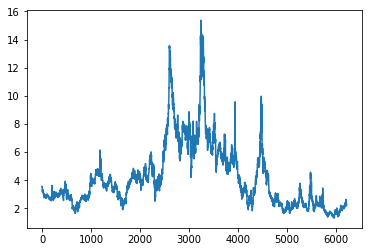

In [4]:
row_data_ng['NG.RNGC1.D'].plot()
plt.show()

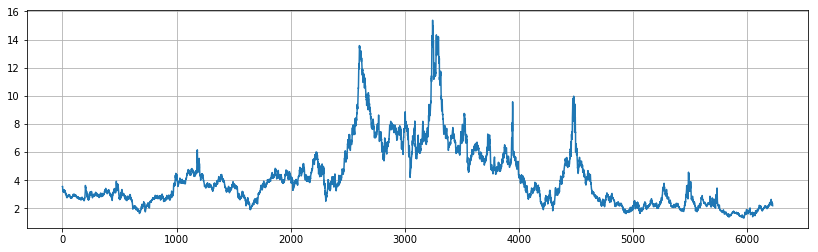

In [5]:
fig= plt.figure(figsize=(14,4)) 
ax= fig.add_subplot(1,1,1) 
ax.plot(row_data_ng.index, row_data_ng['NG.RNGC1.D']) 
plt.grid()
plt.show()
# x축을 날짜로 변환시켜야함.

In [6]:
row_data_ng['Date'].head()
# type(row_data_ng['Date'].values[0]) # date 의 형식은 string

0    20181106
1    20181105
2    20181102
3    20181101
4    20181031
Name: Date, dtype: object

In [7]:
date_conv=pd.to_datetime(row_data_ng['Date'].values) # date의 형식을 datetime으로 변환
date_conv

DatetimeIndex(['2018-11-06', '2018-11-05', '2018-11-02', '2018-11-01',
               '2018-10-31', '2018-10-30', '2018-10-29', '2018-10-26',
               '2018-10-25', '2018-10-24',
               ...
               '1994-01-26', '1994-01-25', '1994-01-24', '1994-01-21',
               '1994-01-20', '1994-01-19', '1994-01-18', '1994-01-17',
               '1994-01-14', '1994-01-13'],
              dtype='datetime64[ns]', length=6223, freq=None)

In [8]:
row_data_ng['Date']= date_conv

In [9]:
row_data_ng['Date']
# type(row_data_ng['Date'].values[0]) # date 의 형식은 numpy.datetime64

0      2018-11-06
1      2018-11-05
2      2018-11-02
3      2018-11-01
4      2018-10-31
5      2018-10-30
6      2018-10-29
7      2018-10-26
8      2018-10-25
9      2018-10-24
10     2018-10-23
11     2018-10-22
12     2018-10-19
13     2018-10-18
14     2018-10-17
15     2018-10-16
16     2018-10-15
17     2018-10-12
18     2018-10-11
19     2018-10-10
20     2018-10-09
21     2018-10-08
22     2018-10-05
23     2018-10-04
24     2018-10-03
25     2018-10-02
26     2018-10-01
27     2018-09-28
28     2018-09-27
29     2018-09-26
          ...    
6193   1994-02-24
6194   1994-02-23
6195   1994-02-22
6196   1994-02-18
6197   1994-02-17
6198   1994-02-16
6199   1994-02-15
6200   1994-02-14
6201   1994-02-11
6202   1994-02-10
6203   1994-02-09
6204   1994-02-08
6205   1994-02-07
6206   1994-02-04
6207   1994-02-03
6208   1994-02-02
6209   1994-02-01
6210   1994-01-31
6211   1994-01-28
6212   1994-01-27
6213   1994-01-26
6214   1994-01-25
6215   1994-01-24
6216   1994-01-21
6217   199

In [10]:
row_data_ng.head()

,Date,NG.RNGC1.D
0,2018-11-06,3.555
1,2018-11-05,3.567
2,2018-11-02,3.284
3,2018-11-01,3.237
4,2018-10-31,3.261


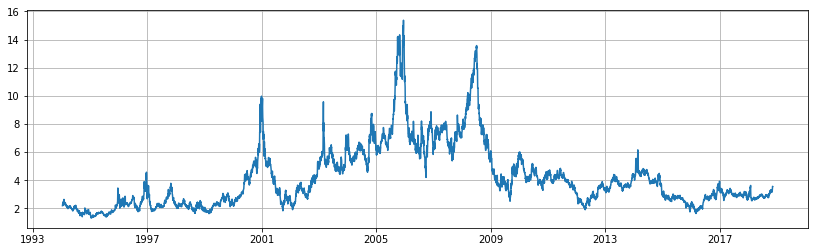

In [11]:
fig= plt.figure(figsize=(14,4)) 
ax= fig.add_subplot(1,1,1) 
ax.plot(row_data_ng['Date'], row_data_ng['NG.RNGC1.D']) 
plt.grid()
plt.show()

In [12]:
ng1= pd.DataFrame(row_data_ng['NG.RNGC1.D'].values, index=row_data_ng['Date'], columns=['NG'])
ng1.tail(10)

,NG
Date,
1994-01-26,2.359
1994-01-25,2.246
1994-01-24,2.470
1994-01-21,2.305
1994-01-20,2.250
1994-01-19,2.252
1994-01-18,2.318
1994-01-17,2.360
1994-01-14,2.268


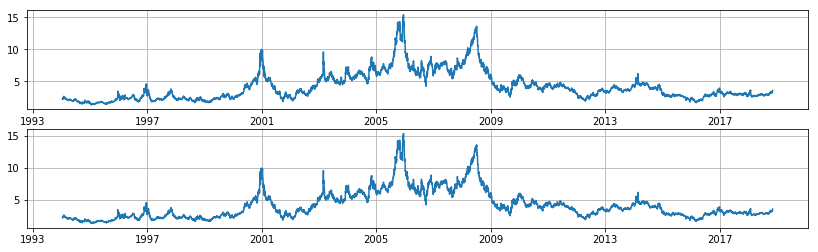

In [13]:
fig= plt.figure(figsize=(14,4)) 
ax1= fig.add_subplot(2,1,1) 
ax2= fig.add_subplot(2,1,2) 
ax1.plot(row_data_ng['Date'], row_data_ng['NG.RNGC1.D']) # 데이터가 제대로 저장되었는지 원본과 비교
ax1.grid()
ax2.plot(ng1.index, ng1['NG']) 
ax2.grid()
plt.show()

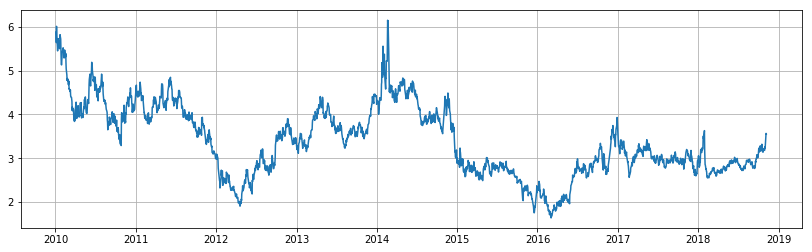

In [14]:
# 원하는 기간을 특정해서 보고싶을때
ng1_split= ng1.loc[:'2010-01-01']

fig= plt.figure(figsize=(14,4)) 
ax= fig.add_subplot(1,1,1) 
ax.plot(ng1_split.index, ng1_split['NG']) 
plt.grid()
plt.show()

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import fix_yahoo_finance as yf # 야후 파이낸스이용시 패치필요

yf.pdr_override()

#한꺼번에 주석처리 ctrl+/
print(pd.__version__)
print(pdr.__version__)

start_date= pd.to_datetime('2010-01-01')
end_date= pd.to_datetime('2018-10-30')
df= pdr.data.get_data_yahoo('033500.KS', start_date, end_date)
df.tail(5)

0.22.0
0.5.0
[*********************100%***********************]  1 of 1 downloaded


""


In [26]:
import FinanceDataReader as fdr

df= fdr.DataReader('033500', '2008-01-01') # 동성화인텍 , 주가는 2014년부터 나옴?    # 한국카본 017960 , # 현대중공업 009540
print(df.head(5))
print(df.tail(5))

            Close   Open   High    Low    Volume  Change
Date                                                    
2014-03-14  12050  11500  12200  11450  687440.0  0.0299
2014-03-17  11850  12100  12150  11700  371340.0 -0.0166
2014-03-18  12200  12000  12350  11900  465610.0  0.0295
2014-03-19  12100  12250  12300  12050  177500.0 -0.0082
2014-03-20  11850  12050  12200  11800  286530.0 -0.0207
            Close  Open  High   Low    Volume  Change
Date                                                 
2018-11-01   6810  6910  6960  6650  212520.0 -0.0087
2018-11-02   7080  6900  7200  6890  153040.0  0.0396
2018-11-05   7390  7200  7480  6920  232320.0  0.0438
2018-11-06   8190  7460  8260  7350  629400.0  0.1083
2018-11-07   8160  8220  8360  7800  378220.0 -0.0037


In [27]:
#KS11 코스피지수, KQ11 코스닥지수
df_kd= fdr.DataReader('KQ11', '2014-03-14') # 코스닥
print(df_kd.head(5))
print(df_kd.tail(5))

             Close    Open    High     Low    Volume  Change
Date                                                        
2014-03-14  544.27  542.87  546.51  542.42  406010.0 -0.0059
2014-03-17  535.82  545.36  546.31  535.54  373690.0 -0.0155
2014-03-18  541.15  540.03  541.43  539.12  381920.0  0.0099
2014-03-19  542.25  544.55  545.17  539.88  364060.0  0.0020
2014-03-20  541.79  541.40  542.29  539.15  369120.0 -0.0008
             Close    Open    High     Low       Volume  Change
Date                                                           
2018-11-02  690.65  666.59  690.65  666.59  564220000.0  0.0505
2018-11-05  691.94  686.76  693.29  680.11  442500000.0  0.0019
2018-11-06  691.55  695.32  695.65  683.31  512020000.0 -0.0006
2018-11-07  682.37  693.56  700.25  677.50  599590000.0 -0.0133
2018-11-08  692.40  695.05  697.25  691.39     427480.0  0.0147


In [28]:
df.dropna()
df_kd.dropna()
print(len(df), len(df_kd))

1172 1143


In [29]:
ng2_split= ng1.loc[:'2014-03-14']
print(len(ng2_split))
ng2_split.tail(5)

1166


,NG
Date,
2014-03-20,4.369
2014-03-19,4.484
2014-03-18,4.456
2014-03-17,4.536
2014-03-14,4.425


In [30]:
# 내림차순, 오름차순 정렬 필요없음.
# 데이터 길이 맞출필요없음.
# merge 함수 이용
tf1= pd.merge(df_kd[['Close']], df[['Close']], left_index= True,  right_index=True)
tf2= pd.merge(tf1, ng2_split, left_index= True,  right_index=True)
tf2.columns= ['KQ', 'DSH', 'LNG']
tf2

,KQ,DSH,LNG
Date,,,
2014-03-14,544.27,12050,4.425
2014-03-17,535.82,11850,4.536
2014-03-18,541.15,12200,4.456
2014-03-19,542.25,12100,4.484
2014-03-20,541.79,11850,4.369
2014-03-21,546.81,11850,4.313
2014-03-24,545.60,12000,4.276
2014-03-25,539.05,11900,4.411
2014-03-26,544.13,12100,4.402


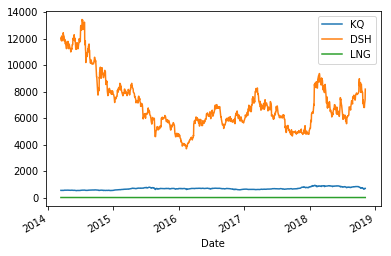

In [31]:
tf2.plot()
# 그래프 각 값에 대한 스케일 조정이 필요함.

In [32]:
# 정규화
from sklearn import preprocessing

# 대상 컬럼 획득
col = ['KQ', 'DSH', 'LNG']
# 정규화 대상 컬럼들의 값 획득
x = tf2[ col ].values

# 전처리(preprocessing) 모듈의 최대, 최소 스캐너 함수
min_max_scaler = preprocessing.MinMaxScaler()
# 배열 데이터(값만 모여있는)를 float로 변경하여 함수 처리
x_scaled = min_max_scaler.fit_transform( x.astype(float) )

# 정규화된 데이터를 다시 원본데이터 각 컬럼에 대입 or 새로 생성
norm_tf = pd.DataFrame(x_scaled, columns=col, index=tf2.index)
norm_tf

,KQ,DSH,LNG
Date,,,
2014-03-14,0.052361,0.856631,0.872807
2014-03-17,0.031441,0.836150,0.907581
2014-03-18,0.044636,0.871992,0.882519
2014-03-19,0.047360,0.861751,0.891291
2014-03-20,0.046221,0.836150,0.855263
2014-03-21,0.058649,0.836150,0.837719
2014-03-24,0.055653,0.851510,0.826128
2014-03-25,0.039438,0.841270,0.868421
2014-03-26,0.052014,0.861751,0.865602


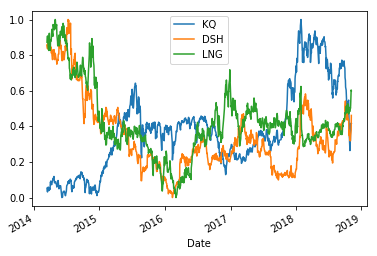

In [33]:
norm_tf.plot()

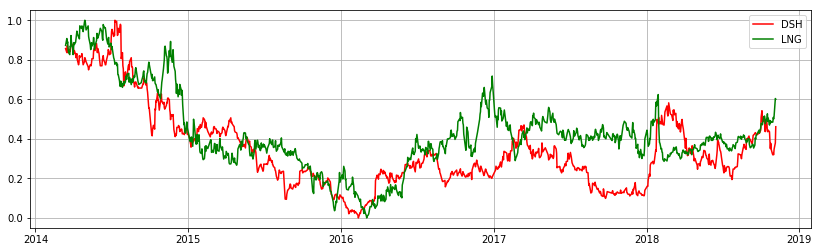

In [34]:
# 코스닥지수 ,동성화인텍주가, LNG 가격흐름 비교
fig= plt.figure(figsize=(14,4)) 
ax= fig.add_subplot(1,1,1) 
#ax.plot(norm_tf['KQ'], color='b', label='KQ')
ax.plot(norm_tf['DSH'], color='r', label='DSH')
ax.plot(norm_tf['LNG'], color='g', label='LNG')
plt.legend()
plt.grid()
plt.show()

In [35]:
# 코스닥지수 ,동성화인텍주가, LNG 가격간의 상관계수
norm_tf.corr()

,KQ,DSH,LNG
KQ,1.000000,-0.391606,-0.493789
DSH,-0.391606,1.000000,0.779113
LNG,-0.493789,0.779113,1.000000
